# Q1 Supervised Outlier Detection

In [35]:
# Import necessary libraries
import os
# Data preprocessing libraries
import pandas as pd
import numpy as np
from collections import Counter

# Libraries for splitting data and scaling features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Libraries for handling imbalanced data
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN  # SMOTEENN is a combined over-sampling and under-sampling technique

# Libraries for machine learning model and evaluation metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report  
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 

# Visualization
import matplotlib.pyplot as plt

## 1. Data Loading

### 1.1 Train Set

In [36]:
# Folder path
train_folder_path = 'Data_Q1/train/'

# Read all training data files
train_files = os.listdir(train_folder_path)
dataframes = []

# Merge all training data files
for file in train_files:
    file_path = os.path.join(train_folder_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate the data
train_data = pd.concat(dataframes, ignore_index=True)

# Display a few rows of data to ensure correct reading
train_data

,x,y,z,a,b,c,d,Is_Falling
0,18.495860,13.766527,14.362624,0,0,0,1,0
1,18.501072,13.827225,14.270268,0,0,1,0,0
2,18.405950,13.868976,14.094804,1,0,0,0,0
3,18.444572,13.910701,14.116078,0,1,0,0,0
4,18.418470,13.933917,14.320566,0,0,0,1,0
...,...,...,...,...,...,...,...,...
134224,9.538934,13.048507,12.344991,0,0,0,1,0
134225,9.545872,13.057525,12.363552,1,0,0,0,0
134226,9.575217,13.080459,12.180427,0,0,1,0,0
134227,9.495590,12.995833,12.142522,0,1,0,0,0


### 1.2 Test Set

In [37]:
# Test data path
test_file_path = 'Data_Q1/test/test_set.csv'

# Read the test data file
test_data = pd.read_csv(test_file_path)

# Display a few rows of data to ensure correct reading
test_data

,ID,x,y,z,a,b,c,d,Is_Falling
0,1,6.912997,11.518698,15.471855,0,0,0,1,0
1,2,6.936432,11.574586,15.446939,0,0,1,0,0
2,3,6.935274,11.571790,15.437505,1,0,0,0,0
3,4,6.886688,11.561593,15.704019,0,0,0,1,0
4,5,6.921823,11.597728,15.634435,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
6618,6619,7.619840,11.961406,15.810897,1,0,0,0,0
6619,6620,7.601608,11.877016,16.006231,0,0,0,1,0
6620,6621,7.633920,11.892471,16.117411,0,0,1,0,0
6621,6622,7.655626,12.022768,15.907901,1,0,0,0,0


## 2. Unbalance Data Exploration and Visualization

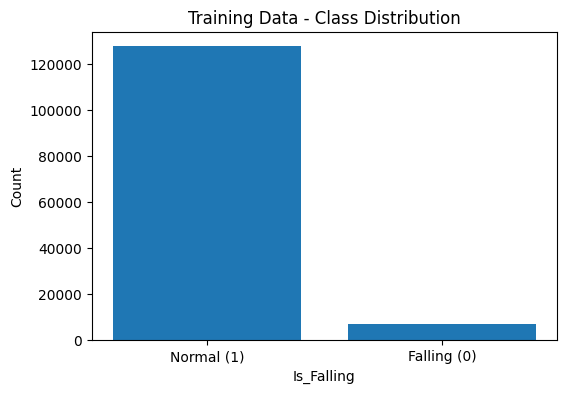

Is_Falling
0    127656
1      6573
Name: count, dtype: int64


In [38]:
# Calculate the count of positive and negative samples in the training data
train_labels_count = train_data['Is_Falling'].value_counts()

# Plot a bar chart to display the count of positive and negative samples
plt.figure(figsize=(6, 4))
plt.bar(train_labels_count.index, train_labels_count.values)
plt.xlabel('Is_Falling')
plt.ylabel('Count')
plt.title('Training Data - Class Distribution')
plt.xticks(train_labels_count.index, ['Normal (1)', 'Falling (0)'])
plt.show()

# Display the count of positive and negative samples
print(train_labels_count)


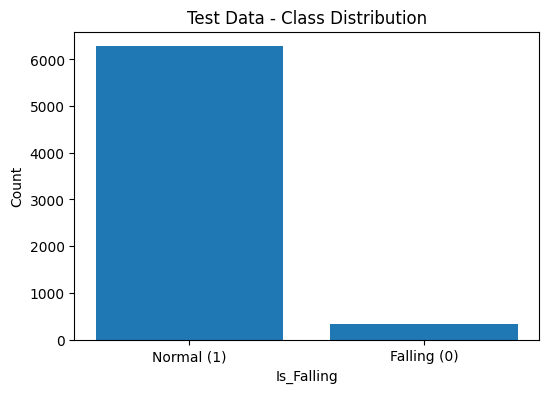

Is_Falling
0    6280
1     343
Name: count, dtype: int64


In [39]:
# Calculate the count of positive and negative samples in the test data
test_labels_count = test_data['Is_Falling'].value_counts()

# Plot a bar chart to display the count of positive and negative samples
plt.figure(figsize=(6, 4))
plt.bar(test_labels_count.index, test_labels_count.values)
plt.xlabel('Is_Falling')
plt.ylabel('Count')
plt.title('Test Data - Class Distribution')
plt.xticks(test_labels_count.index, ['Normal (1)', 'Falling (0)'])
plt.show()

# Display the count of positive and negative samples
print(test_labels_count)

## 3. Unbalance Processing

In [40]:
train_data

,x,y,z,a,b,c,d,Is_Falling
0,18.495860,13.766527,14.362624,0,0,0,1,0
1,18.501072,13.827225,14.270268,0,0,1,0,0
2,18.405950,13.868976,14.094804,1,0,0,0,0
3,18.444572,13.910701,14.116078,0,1,0,0,0
4,18.418470,13.933917,14.320566,0,0,0,1,0
...,...,...,...,...,...,...,...,...
134224,9.538934,13.048507,12.344991,0,0,0,1,0
134225,9.545872,13.057525,12.363552,1,0,0,0,0
134226,9.575217,13.080459,12.180427,0,0,1,0,0
134227,9.495590,12.995833,12.142522,0,1,0,0,0


In [41]:
# Separate features and labels
X_train = train_data.drop('Is_Falling', axis=1)
y_train = train_data['Is_Falling']

# Create an randomOverSampler object and perform oversampling
oversampler = RandomOverSampler(random_state=42)
X_train_resampled_with_randomoversampler, y_train_resampled_with_randomoversampler = oversampler.fit_resample(X_train, y_train)

# Create an SMOTE object and perform resampling
smote = SMOTE(random_state=42)
X_train_resampled_with_smote, y_train_resampled_with_smote = smote.fit_resample(X_train, y_train)

# Create an SMOTEENN object and perform resampling
smote_enn = SMOTEENN(random_state=28)
X_train_resampled_with_smote_enn, y_train_resampled_with_smote_enn = smote_enn.fit_resample(X_train, y_train)

# Display the sample count after oversampling
print("Shape of original training data:")
print(X_train.shape, y_train.shape)
print("Shape of oversampler-based resampled training data:")
print(X_train_resampled_with_randomoversampler.shape, y_train_resampled_with_randomoversampler.shape)
print("Shape of smote-based resampled training data:")
print(X_train_resampled_with_smote.shape, y_train_resampled_with_smote.shape)
print("Shape of smoteenn-based resampled training data:")
print(X_train_resampled_with_smote_enn.shape, y_train_resampled_with_smote_enn.shape)

Shape of original training data:
(134229, 7) (134229,)
Shape of oversampler-based resampled training data:
(255312, 7) (255312,)
Shape of smote-based resampled training data:
(255312, 7) (255312,)
Shape of smoteenn-based resampled training data:
(241184, 7) (241184,)


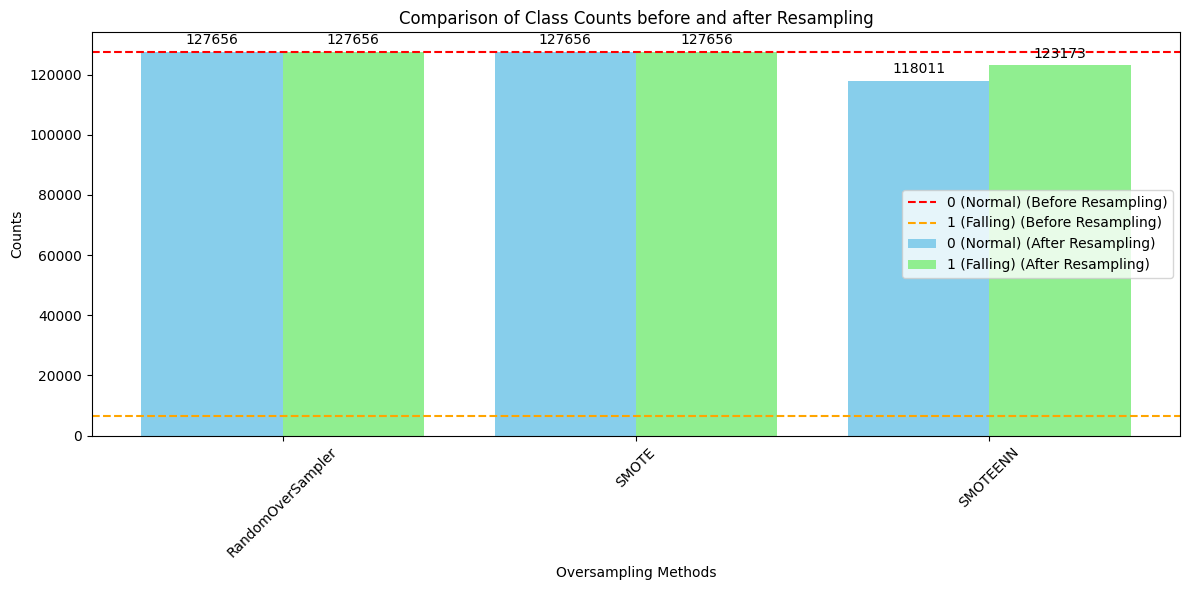

In [42]:
import numpy as np

# 存储上采样前的标签数量
original_counts_0 = y_train.value_counts()[0]
original_counts_1 = y_train.value_counts()[1]

methods = ['RandomOverSampler', 'SMOTE', 'SMOTEENN']

# 存储上采样后的标签数量
resampled_counts_0 = [
    y_train_resampled_with_randomoversampler.value_counts()[0],
    y_train_resampled_with_smote.value_counts()[0],
#     y_train_resampled_with_adasyn.value_counts()[0],
#     y_train_resampled_with_borderline_smote.value_counts()[0],
    y_train_resampled_with_smote_enn.value_counts()[0]
]

resampled_counts_1 = [
    y_train_resampled_with_randomoversampler.value_counts()[1],
    y_train_resampled_with_smote.value_counts()[1],
#     y_train_resampled_with_adasyn.value_counts()[1],
#     y_train_resampled_with_borderline_smote.value_counts()[1],
    y_train_resampled_with_smote_enn.value_counts()[1]
]

# 设置图形的位置和宽度
bar_width = 0.4
index = np.arange(len(methods))

plt.figure(figsize=(12, 6))

# 绘制柱状图
bars1 = plt.bar(index - bar_width/2, resampled_counts_0, bar_width, color='skyblue', label='0 (Normal) (After Resampling)')
bars2 = plt.bar(index + bar_width/2, resampled_counts_1, bar_width, color='lightgreen', label='1 (Falling) (After Resampling)')

# 上采样前的标签数量
plt.axhline(y=original_counts_0, color='red', linestyle='--', label='0 (Normal) (Before Resampling)')
plt.axhline(y=original_counts_1, color='orange', linestyle='--', label='1 (Falling) (Before Resampling)')

# 添加数值标签
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)

plt.xlabel('Oversampling Methods')
plt.ylabel('Counts')
plt.title('Comparison of Class Counts before and after Resampling')
plt.xticks(index, methods, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 4. Outlier Detection

### 4.1 Bad Model Example:

In [103]:
# Trainning Model RandomForestClassifier on SMOTE ENN
model_after_smote_enn = RandomForestClassifier(n_estimators = 5, random_state=2, max_depth=2)
model_after_smote_enn.fit(X_train_resampled_with_smote_enn, y_train_resampled_with_smote_enn)
# Model evaluation
y_pred = model_after_smote_enn.predict(test_data.drop(['ID', 'Is_Falling'], axis=1))

print("On Train set with SMOTE ENN:")
print("Random Forest Pyperparameter: n_estimators = 5, random_state=0, max_depth=2")
print("Confusion Matrix:")
print(confusion_matrix(test_data['Is_Falling'], y_pred))
print(classification_report(test_data['Is_Falling'], y_pred))

On Train set with SMOTE ENN:
Random Forest Pyperparameter: n_estimators = 5, random_state=0, max_depth=2
Confusion Matrix:
[[6191   89]
 [ 245   98]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6280
           1       0.52      0.29      0.37       343

    accuracy                           0.95      6623
   macro avg       0.74      0.64      0.67      6623
weighted avg       0.94      0.95      0.94      6623



##### NOT a good result!

**For samples labeled as 1, recall is more important because we want to detect "cats falling" in a timely manner.**

**Compared to the fact that the number of reminders for "cats falling" is more than the actual situation, the worse result is that the number of reminders for "cats falling" is less than the actual situation**

In [62]:
# Trainning Model RandomForestClassifier on SMOTE ENN
model_after_smote_enn = RandomForestClassifier(n_estimators = 5, random_state=42, max_depth=2)
model_after_smote_enn.fit(X_train_resampled_with_smote_enn, y_train_resampled_with_smote_enn)
# Model evaluation
y_pred = model_after_smote_enn.predict(test_data.drop(['ID', 'Is_Falling'], axis=1))

print("On Train set with SMOTE ENN:")
print("Random Forest Pyperparameter: n_estimators = 5, random_state=42, max_depth=2")
print("Confusion Matrix:")
print(confusion_matrix(test_data['Is_Falling'], y_pred))
print(classification_report(test_data['Is_Falling'], y_pred))

On Train set with SMOTE ENN:
Random Forest Pyperparameter: n_estimators = 5, random_state=42, max_depth=2
Confusion Matrix:
[[2524 3756]
 [   0  343]]
              precision    recall  f1-score   support

           0       1.00      0.40      0.57      6280
           1       0.08      1.00      0.15       343

    accuracy                           0.43      6623
   macro avg       0.54      0.70      0.36      6623
weighted avg       0.95      0.43      0.55      6623



##### Also NOT a good result!

**For samples labeled as 1, recall is more important, but if there are too many false positives (low accuracy), the alarm loses its meaning**

### 4.2 Three Final Model:

In [116]:
# Trainning Model RandomForestClassifier on randomOverSampler
model_after_randomoversampler = RandomForestClassifier(random_state=42, max_depth=2)
model_after_randomoversampler.fit(X_train_resampled_with_randomoversampler, y_train_resampled_with_randomoversampler)
# Model evaluation
y_pred_randomoversampler = model_after_randomoversampler.predict(test_data.drop(['ID', 'Is_Falling'], axis=1))

print("-----------------On Train set with random oversampler-----------------\n")
print("Random Forest Pyperparameter: n_estimators = 100, random_state=42, max_depth=2")
print("Confusion Matrix:")
print(confusion_matrix(test_data['Is_Falling'], y_pred_randomoversampler))
print(classification_report(test_data['Is_Falling'], y_pred_randomoversampler))
print("----------------------------------------------------------------------")

-----------------On Train set with random oversampler-----------------

Random Forest Pyperparameter: n_estimators = 100, random_state=42, max_depth=2
Confusion Matrix:
[[5625  655]
 [ 127  216]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      6280
           1       0.25      0.63      0.36       343

    accuracy                           0.88      6623
   macro avg       0.61      0.76      0.65      6623
weighted avg       0.94      0.88      0.91      6623

----------------------------------------------------------------------


In [123]:
# Trainning Model RandomForestClassifier on SMOTE
model_after_smote = RandomForestClassifier(random_state=42, max_depth=2)
model_after_smote.fit(X_train_resampled_with_smote, y_train_resampled_with_smote)
# Model evaluation
y_pred_smote = model_after_smote.predict(test_data.drop(['ID', 'Is_Falling'], axis=1))

print("----------------------On Train set with smote-----------------------\n")
print("Random Forest Pyperparameter: n_estimators = 100, random_state=42, max_depth=2")
print("Confusion Matrix:")
print(confusion_matrix(test_data['Is_Falling'], y_pred_smote))
print(classification_report(test_data['Is_Falling'], y_pred_smote))
print("---------------------------------------------------------------------")

----------------------On Train set with smote-----------------------

Random Forest Pyperparameter: n_estimators = 100, random_state=42, max_depth=2
Confusion Matrix:
[[5629  651]
 [ 127  216]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      6280
           1       0.25      0.63      0.36       343

    accuracy                           0.88      6623
   macro avg       0.61      0.76      0.65      6623
weighted avg       0.94      0.88      0.91      6623

---------------------------------------------------------------------


In [119]:
# Trainning Model RandomForestClassifier on SMOTE ENN
model_after_smote_enn = RandomForestClassifier(n_estimators=5, random_state=0, max_depth=2)
model_after_smote_enn.fit(X_train_resampled_with_smote_enn, y_train_resampled_with_smote_enn)
# Model evaluation
y_pred_smote_enn = model_after_smote_enn.predict(test_data.drop(['ID', 'Is_Falling'], axis=1))

print("--------------------On Train set with SMOTE ENN:---------------------\n")
print("Random Forest Pyperparameter: n_estimators = 5, random_state=0, max_depth=2")
print("Confusion Matrix:")
print(confusion_matrix(test_data['Is_Falling'], y_pred_smote_enn))
print(classification_report(test_data['Is_Falling'], y_pred_smote_enn))
print("----------------------------------------------------------------------")

--------------------On Train set with SMOTE ENN:---------------------

Random Forest Pyperparameter: n_estimators = 5, random_state=0, max_depth=2
Confusion Matrix:
[[6099  181]
 [ 228  115]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6280
           1       0.39      0.34      0.36       343

    accuracy                           0.94      6623
   macro avg       0.68      0.65      0.66      6623
weighted avg       0.93      0.94      0.94      6623

----------------------------------------------------------------------


## 5.Result Output

In [143]:
print("----------------------On Train set with smote-----------------------\n")
print("Random Forest Pyperparameter: n_estimators = 100, random_state=42, max_depth=2")
print("Confusion Matrix:")
print(confusion_matrix(test_data['Is_Falling'], y_pred_smote))
print(classification_report(test_data['Is_Falling'], y_pred_smote))
print("---------------------------------------------------------------------")

----------------------On Train set with smote-----------------------

Random Forest Pyperparameter: n_estimators = 100, random_state=42, max_depth=2
Confusion Matrix:
[[5629  651]
 [ 127  216]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      6280
           1       0.25      0.63      0.36       343

    accuracy                           0.88      6623
   macro avg       0.61      0.76      0.65      6623
weighted avg       0.94      0.88      0.91      6623

---------------------------------------------------------------------


In [120]:
# Output
output = pd.DataFrame({'ID': test_data['ID'], 'Is_Falling': y_pred_smote})
output.to_csv('Q1_output.csv', index=False)

In [142]:
# Calculate the count of positive and negative samples in the test data
output_count = output.value_counts()

# Display the count of positive and negative samples
print(test_labels_count)

Is_Falling
0    6280
1     343
Name: count, dtype: int64


---

In [ ]:
# # Create an ADASYN object and perform resampling
# adasyn = ADASYN(random_state=42)
# X_train_resampled_with_adasyn, y_train_resampled_with_adasyn = adasyn.fit_resample(X_train, y_train)

# print("Shape of ADASYN-based resampled training data:")
# print(X_train_resampled_with_adasyn.shape, y_train_resampled_with_adasyn.shape)

# model_after_adasyn = RandomForestClassifier(n_estimators=5, random_state=0, max_depth=2)
# model_after_adasyn.fit(X_train_resampled_with_adasyn, y_train_resampled_with_adasyn)

# y_pred = model_after_adasyn.predict(test_data.drop(['ID', 'Is_Falling'], axis=1))

# print("Confusion Matrix:")
# print(confusion_matrix(test_data['Is_Falling'], y_pred))
# print("On Train set with adasyn:")
# print(classification_report(test_data['Is_Falling'], y_pred))



# # Create a Borderline-SMOTE object and perform resampling
# borderline_smote = BorderlineSMOTE(random_state=42)
# X_train_resampled_with_borderline_smote, y_train_resampled_with_borderline_smote = borderline_smote.fit_resample(X_train, y_train)

# print("Shape of Borderline-SMOTE-based resampled training data:")
# print(X_train_resampled_with_borderline_smote.shape, y_train_resampled_with_borderline_smote.shape)

# model_after_borderline_smote = RandomForestClassifier(n_estimators=5, random_state=0, max_depth=2)
# model_after_borderline_smote.fit(X_train_resampled_with_borderline_smote, y_train_resampled_with_borderline_smote)

# y_pred = model_after_borderline_smote.predict(test_data.drop(['ID', 'Is_Falling'], axis=1))

# # 生成混淆矩阵
# print("Confusion Matrix:")
# print(confusion_matrix(test_data['Is_Falling'], y_pred))
# print("On Train set with smote:")
# print(classification_report(test_data['Is_Falling'], y_pred))
